In [6]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
from ydata_profiling import ProfileReport
%matplotlib inline


In [7]:
meses = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec"]
area_id_to_name = {
    "E09000001": "City of London",
    "E09000002": "Barking and Dagenham",
    "E09000003": "Barnet",
    "E09000004": "Bexley",
    "E09000005": "Brent",
    "E09000006": "Bromley",
    "E09000007": "Camden",
    "E09000008": "Croydon",
    "E09000009": "Ealing",
    "E09000010": "Enfield",
    "E09000011": "Greenwich",
    "E09000012": "Hackney",
    "E09000013": "Hammersmith and Fulham",
    "E09000014": "Haringey",
    "E09000015": "Harrow",
    "E09000016": "Havering",
    "E09000017": "Hillingdon",
    "E09000018": "Hounslow",
    "E09000019": "Islington",
    "E09000020": "Kensington and Chelsea",
    "E09000021": "Kingston upon Thames",
    "E09000022": "Lambeth",
    "E09000023": "Lewisham",
    "E09000024": "Merton",
    "E09000025": "Newham",
    "E09000026": "Redbridge",
    "E09000027": "Richmond upon Thames",
    "E09000028": "Southwark",
    "E09000029": "Sutton",
    "E09000030": "Tower Hamlets",
    "E09000031": "Waltham Forest",
    "E09000032": "Wandsworth",
    "E09000033": "Westminster"
}

dataframes = []
for mes in meses:
    nombre_archivo = f"./Datasets/OG_datasets/{mes}.csv"
    df = pd.read_csv(nombre_archivo)
    df["mes"] = mes
    df["Local Authority"] = df["area_id"].map(area_id_to_name)
    dataframes.append(df)
fusion_df=pd.concat(dataframes,ignore_index=True)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
display(fusion_df)

,area_id,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,...,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km,mes,Local Authority
0,E09000001,330.866887,32.5,150.0,260.0,440.0,1000.0,342.577936,3.607936,104.009275,...,3697.0,2990.0,1018.0,4349.0,1320.0,43.910124,2.90,2305.862069,Jan,City of London
1,E09000002,415.302544,32.5,170.0,320.0,500.0,1500.0,517.414980,2.451022,127.208198,...,99442.0,103659.0,60281.0,123180.0,19640.0,33.017321,36.09,5627.625381,Jan,Barking and Dagenham
2,E09000003,409.869545,39.0,180.0,330.0,500.0,1100.0,416.632903,0.549487,119.839131,...,186357.0,192421.0,88754.0,237036.0,52988.0,37.195582,86.76,4365.813739,Jan,Barnet
3,E09000004,364.805547,30.0,150.0,290.0,480.0,1000.0,423.930671,2.409420,112.313670,...,116814.0,125573.0,56028.0,146237.0,40122.0,38.880749,60.58,4001.105976,Jan,Bexley
4,E09000005,426.646722,35.0,175.0,335.0,500.0,1500.0,538.379912,1.062093,134.025334,...,163939.0,159504.0,75033.0,211885.0,36525.0,35.766416,43.28,7473.267098,Jan,Brent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,E09000029,318.592094,30.0,125.0,227.0,400.0,1000.0,382.710891,3.614588,104.883033,...,97427.0,102443.0,46142.0,123600.0,30128.0,38.449162,43.80,4563.242009,Dec,Sutton
392,E09000030,416.380488,40.0,170.0,300.0,500.0,1500.0,505.140994,0.932993,117.950244,...,152762.0,141066.0,64797.0,211354.0,17677.0,31.514726,19.75,14877.367089,Dec,Tower Hamlets
393,E09000031,434.528453,42.0,190.0,325.0,500.0,1500.0,522.080691,0.742776,119.112970,...,135651.0,135020.0,65030.0,177768.0,27873.0,34.990623,38.86,6965.285641,Dec,Waltham Forest
394,E09000032,376.886546,39.0,157.6,280.0,480.0,1000.0,430.492026,1.277555,107.855843,...,154118.0,165359.0,61036.0,229044.0,29397.0,34.811996,34.25,9327.795620,Dec,Wandsworth


In [8]:
area_ids=list(area_id_to_name.values())


In [9]:
#we remove some columns of the dataframe
all_months_cleaned = fusion_df[[f for f in fusion_df if "perc" not in f and "ci" not in f and "std" not in f]]

In [10]:
display(all_months_cleaned)

,area_id,weight,volume,fat,saturate,salt,sugar,protein,carb,fibre,...,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km,mes,Local Authority
0,E09000001,330.866887,104.009275,8.164527,3.248682,0.551583,8.951228,5.393788,15.803970,1.645398,...,3697.0,2990.0,1018.0,4349.0,1320.0,43.910124,2.90,2305.862069,Jan,City of London
1,E09000002,415.302544,127.208198,8.786498,3.434757,0.621555,10.450692,5.277972,19.965530,1.634745,...,99442.0,103659.0,60281.0,123180.0,19640.0,33.017321,36.09,5627.625381,Jan,Barking and Dagenham
2,E09000003,409.869545,119.839131,8.195621,3.241634,0.584918,9.280870,5.231916,17.180512,1.688865,...,186357.0,192421.0,88754.0,237036.0,52988.0,37.195582,86.76,4365.813739,Jan,Barnet
3,E09000004,364.805547,112.313670,8.492302,3.224135,0.611798,10.530100,5.409954,20.304039,1.726626,...,116814.0,125573.0,56028.0,146237.0,40122.0,38.880749,60.58,4001.105976,Jan,Bexley
4,E09000005,426.646722,134.025334,8.552928,3.383105,0.592456,9.914390,5.268881,18.976397,1.648457,...,163939.0,159504.0,75033.0,211885.0,36525.0,35.766416,43.28,7473.267098,Jan,Brent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,E09000029,318.592094,104.883033,10.273078,4.026804,0.571992,12.036531,5.272579,20.472261,1.625849,...,97427.0,102443.0,46142.0,123600.0,30128.0,38.449162,43.80,4563.242009,Dec,Sutton
392,E09000030,416.380488,117.950244,9.805574,3.877056,0.610121,10.701686,5.277204,19.356105,1.579758,...,152762.0,141066.0,64797.0,211354.0,17677.0,31.514726,19.75,14877.367089,Dec,Tower Hamlets
393,E09000031,434.528453,119.112970,9.971714,4.047997,0.637900,10.155057,5.364066,18.589396,1.546159,...,135651.0,135020.0,65030.0,177768.0,27873.0,34.990623,38.86,6965.285641,Dec,Waltham Forest
394,E09000032,376.886546,107.855843,9.721846,3.927598,0.596985,10.128775,5.335282,18.040184,1.570392,...,154118.0,165359.0,61036.0,229044.0,29397.0,34.811996,34.25,9327.795620,Dec,Wandsworth


In [11]:
#We will create a new folder with all the separate cleaned datasets
for mes in meses:
    nombre_archivo = f"./Datasets/OG_datasets/{mes}.csv"
    df = pd.read_csv(nombre_archivo)
    df["mes"] = mes
    df["Local Authority"] = df["area_id"].map(area_id_to_name)
    df = df[[f for f in df if "perc" not in f and "ci" not in f and "std" not in f]]
    df.to_csv(f"./Datasets/cleaned_datasets/{mes}.csv",index=False)
    df.to_csv(f"./Datasets/cleaned_datasets_esp/{mes}.csv",index=False, sep=';', decimal=',')
nombre_archivo = f"./Datasets/OG_datasets/Yearly.csv"
df = pd.read_csv(nombre_archivo)
df["Local Authority"] = df["area_id"].map(area_id_to_name)
df = df[[f for f in df if "perc" not in f and "ci" not in f and "std" not in f]]
df.to_csv(f"./Datasets/cleaned_datasets/Yearly.csv",index=False)
df.to_csv(f"./Datasets/cleaned_datasets_esp/Yearly.csv",index=False, sep=';', decimal=',')

In [12]:
#Lets work with the yearly dataset
df = pd.read_csv("./Datasets/cleaned_datasets/Yearly.csv")
#new dataset focusing only in age and nutrients
columns = df.loc[:,"weight":"alcohol"].columns.tolist()+df.loc[:,"h_nutrients_weight":"h_nutrients_calories_norm"].columns.tolist()+["population","avg_age","Local Authority"]
new_df = df[columns]
display(new_df)


,weight,volume,fat,saturate,salt,sugar,protein,carb,fibre,alcohol,h_nutrients_weight,h_nutrients_weight_norm,h_nutrients_calories,h_nutrients_calories_norm,population,avg_age,Local Authority
0,323.174750,98.842963,8.472985,3.361599,0.530496,9.278065,5.253333,15.779639,1.619850,0.340719,1.731208,0.745591,1.618208,0.696924,6687.0,43.910124,City of London
1,421.304125,122.341294,9.209959,3.596834,0.603081,10.793244,5.193872,19.784988,1.590335,0.202540,1.621699,0.698428,1.545272,0.665513,203101.0,33.017321,Barking and Dagenham
2,407.170491,114.933771,8.594464,3.407353,0.567211,9.530548,5.129627,17.025950,1.638639,0.227761,1.683080,0.724863,1.581507,0.681118,378778.0,37.195582,Barnet
3,359.544126,106.446426,9.119180,3.466346,0.591326,10.941085,5.304496,19.997105,1.657118,0.201325,1.624957,0.699831,1.551703,0.668282,242387.0,38.880749,Bexley
4,434.324141,128.930369,8.962466,3.559913,0.570477,10.148610,5.132915,18.726476,1.585978,0.206757,1.640469,0.706512,1.555736,0.670019,323443.0,35.766416,Brent
5,319.336273,101.105159,9.123054,3.556924,0.563583,11.218737,5.226795,19.175528,1.629872,0.273349,1.649196,0.710270,1.567786,0.675209,325303.0,39.853429,Bromley
6,348.420414,102.525979,8.801149,3.503451,0.540383,9.426071,5.234502,16.306470,1.633295,0.274655,1.711028,0.736900,1.593632,0.686340,243837.0,35.934276,Camden
7,353.636123,107.461977,9.093330,3.529783,0.567815,10.969373,5.175919,19.016231,1.599582,0.224621,1.640746,0.706631,1.556777,0.670467,380070.0,36.896435,Croydon
8,358.569245,106.197369,9.012152,3.588559,0.584657,9.602238,5.368475,17.213207,1.651458,0.234214,1.690786,0.728182,1.580769,0.680800,344285.0,36.143460,Ealing
9,416.062456,122.353062,8.890419,3.521348,0.623143,9.947049,5.480699,18.567564,1.565853,0.225593,1.655364,0.712927,1.573451,0.677648,328738.0,36.190751,Enfield


In [13]:
# profile = ProfileReport(new_df, title="Pandas Profiling Report")

In [14]:
# profile.to_file("nutrients_age.html")

In [15]:
#now do the same with categories
df = pd.read_csv("./Datasets/cleaned_datasets/Yearly.csv")
columns = df.loc[:,"f_beer":"f_wine"].columns.tolist()+["population","avg_age","Local Authority"]
new_df = df[columns]
display(new_df)
# profile = ProfileReport(new_df, title="Pandas Profiling Report")
# profile.to_file("categories_age.html")

,f_beer,f_dairy,f_eggs,f_fats_oils,f_fish,f_fruit_veg,f_grains,f_meat_red,f_poultry,f_readymade,f_sauces,f_soft_drinks,f_spirits,f_sweets,f_tea_coffee,f_water,f_wine,population,avg_age,Local Authority
0,0.026307,0.121101,0.011756,0.022851,0.021307,0.322872,0.122289,0.046465,0.018064,0.057108,0.011381,0.021961,0.003293,0.139697,0.004958,0.022606,0.025985,6687.0,43.910124,City of London
1,0.010783,0.096583,0.011266,0.031448,0.020717,0.248116,0.157618,0.051076,0.020254,0.061959,0.014344,0.037077,0.003822,0.179794,0.006770,0.039458,0.008913,203101.0,33.017321,Barking and Dagenham
2,0.011298,0.106467,0.012773,0.032430,0.024277,0.327326,0.132781,0.050390,0.020199,0.048065,0.014555,0.023797,0.003019,0.141607,0.006141,0.029242,0.015634,378778.0,37.195582,Barnet
3,0.012231,0.095073,0.008948,0.025275,0.017349,0.251681,0.170318,0.046667,0.020140,0.080289,0.012818,0.031980,0.003100,0.172936,0.006770,0.031482,0.012945,242387.0,38.880749,Bexley
4,0.010729,0.115018,0.012938,0.032990,0.020180,0.270670,0.157685,0.046171,0.020670,0.047499,0.013811,0.031545,0.003703,0.161408,0.005914,0.037473,0.011597,323443.0,35.766416,Brent
5,0.019327,0.096956,0.008775,0.023215,0.016209,0.247085,0.164548,0.042790,0.017570,0.077219,0.013160,0.035204,0.003032,0.179765,0.005713,0.028668,0.020766,325303.0,39.853429,Bromley
6,0.016162,0.117740,0.012189,0.027497,0.023463,0.321332,0.130472,0.043330,0.018664,0.053354,0.012865,0.022920,0.002551,0.142966,0.005284,0.025420,0.023789,243837.0,35.934276,Camden
7,0.014641,0.099640,0.009745,0.025935,0.018104,0.247149,0.161678,0.044945,0.019698,0.068986,0.013652,0.039888,0.003607,0.172795,0.006453,0.037988,0.015095,380070.0,36.896435,Croydon
8,0.014243,0.115131,0.012811,0.029560,0.022682,0.303364,0.142617,0.049917,0.019974,0.053913,0.014388,0.023124,0.003230,0.146897,0.006160,0.025098,0.016891,344285.0,36.143460,Ealing
9,0.010893,0.105186,0.012326,0.033649,0.022679,0.265979,0.146914,0.060895,0.025171,0.054655,0.017791,0.028820,0.003316,0.160056,0.006200,0.031428,0.014043,328738.0,36.190751,Enfield


c:\Users\javit\AppData\Local\Programs\Python\Python311\Lib\site-packages\ydata_profiling\utils\dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
#Now lets explore monthly data for each borough
dataframes = []
for mes in meses:
    nombre_archivo = f"./Datasets/Cleaned_datasets/{mes}.csv"
    df = pd.read_csv(nombre_archivo)
    dataframes.append(df)
comb_df=pd.concat(dataframes,ignore_index=True)


In [17]:
# display(comb_df)

In [18]:
dataframes_por_area = {area: data for area, data in comb_df.groupby("Local Authority")}
current_area = "Waltham Forest"
current_df = dataframes_por_area[current_area]
columns = current_df.loc[:,"f_beer":"f_wine"].columns.tolist()+["population","avg_age","Local Authority"]



In [19]:
output_dir = "./Datasets/Borough_dataset_monthly"
os.makedirs(output_dir, exist_ok=True)

for area_name, df_area in dataframes_por_area.items():
    safe_area_name = area_name.replace(" ", "_").replace("/", "-")
    file_path = os.path.join(output_dir, f"{safe_area_name}.csv")
    df_area.to_csv(file_path, index=False, encoding="utf-8", sep=';', decimal=',')

In [20]:
# city_of_london_df['f_beer']

In [21]:
area_name = area_ids[6]

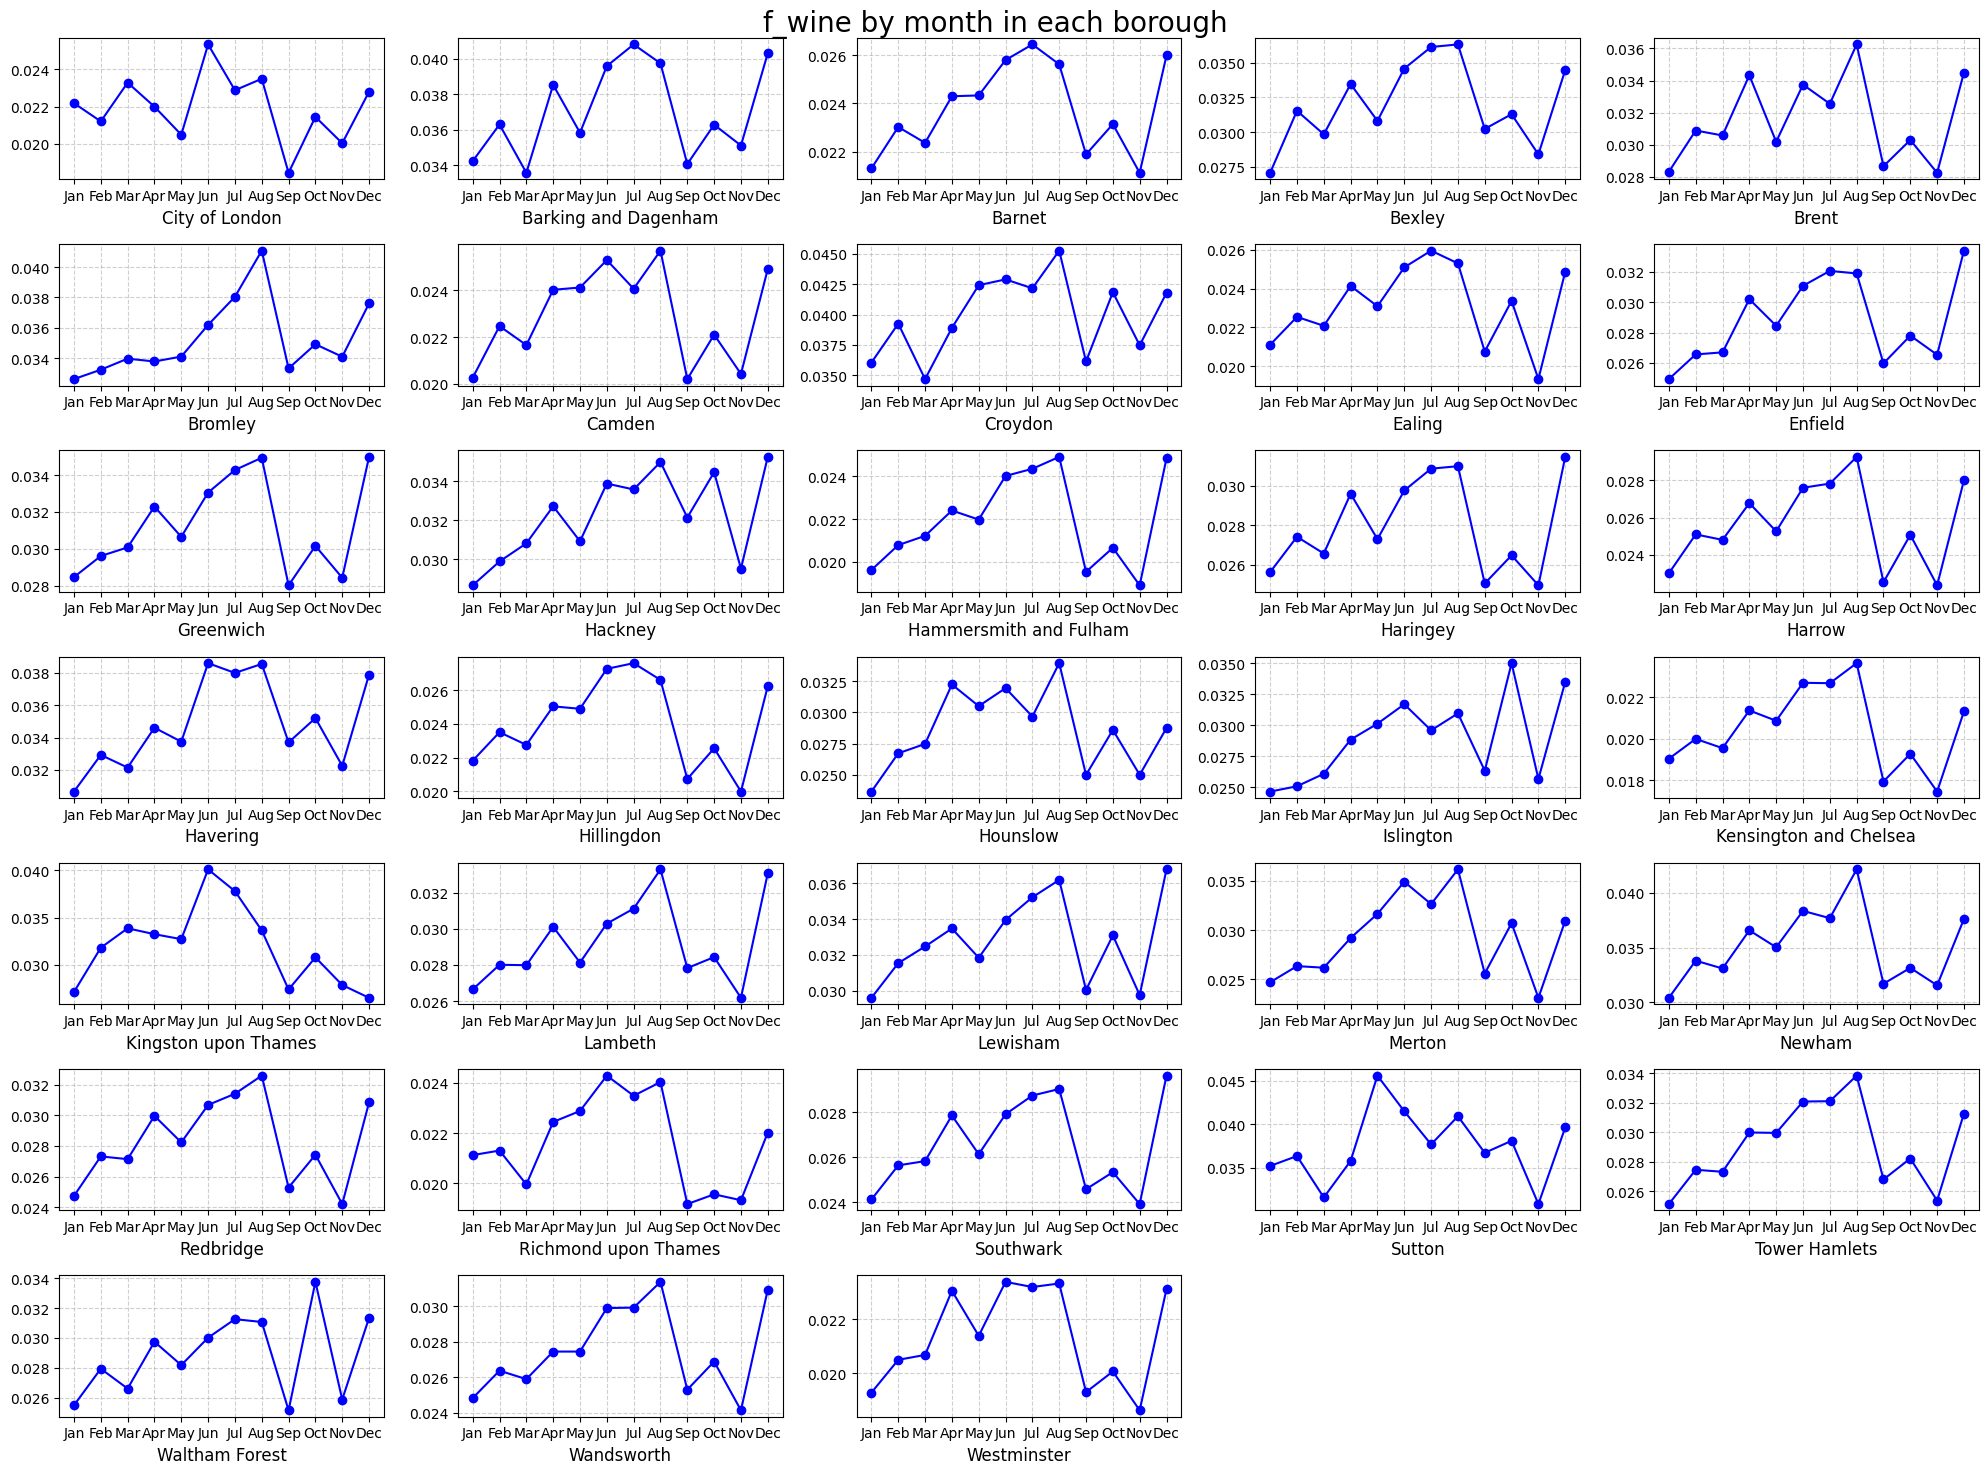

In [22]:

fig, ax = plt.subplots(7,5, figsize=(20, 15))
axes=ax.flatten()
for i, ax in enumerate(axes[:33]):
    ax.plot(dataframes_por_area[area_ids[i]]['mes'], dataframes_por_area[area_ids[i]]['f_soft_drinks'], marker='o', linestyle='-', color='b')
    ax.set_xlabel(area_ids[i], fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.6)
for ax in axes[33:]:
    ax.axis('off')
plt.suptitle('f_wine by month in each borough',fontsize=20)
plt.tight_layout()
plt.show()


# Educational attainment dataset


In [23]:
file_path="./Datasets/School attainment/GCSE_results.xlsx"
ed_df = pd.read_excel(file_path)

In [24]:
new_ed_df = ed_df[~ed_df[ed_df.columns[-11:]].isin(["Supp"]).any(axis=1)]
new_ed_df = new_ed_df.map(lambda x: x.strip() if isinstance(x, str) else x)

borough_df = new_ed_df[new_ed_df["Local Authority"].isin(area_ids)]
columns = ["Local Authority"]+borough_df.columns[-11:]
final_df = borough_df[["Local Authority"]+list(borough_df.columns[-11:])].groupby("Local Authority", as_index=False).sum()
display(final_df)
final_df["% *"] = final_df["*"] / final_df["Number of entries"]
final_df["% A"] = final_df["A"] / final_df["Number of entries"]
final_df["% B"] = final_df["B"] / final_df["Number of entries"]
final_df["% C"] = final_df["C"] / final_df["Number of entries"]
final_df["% D"] = final_df["D"] / final_df["Number of entries"]
final_df["% E"] = final_df["E"] / final_df["Number of entries"]
final_df["% F"] = final_df["F"] / final_df["Number of entries"]
final_df["% G"] = final_df["G"] / final_df["Number of entries"]
final_df["% U"] = final_df["U"] / final_df["Number of entries"]
final_df["% No Result"] = final_df["No Result"] / final_df["Number of entries"]
display(final_df)

,Local Authority,Number of entries,*,A,B,C,D,E,F,G,U,No Result
0,Barking and Dagenham,18518,731,2321,4225,5112,3228,1525,777,331,203,65
1,Barnet,35997,5759,7733,8483,7276,3903,1567,658,341,198,79
2,Bexley,30804,2250,4694,7187,7828,4590,2115,961,473,433,273
3,Brent,29000,2576,5220,7104,6912,3870,1686,766,391,348,127
4,Bromley,30765,3206,5670,7576,7464,3912,1548,691,360,258,80
5,Camden,14319,1636,2437,3181,3303,2135,911,387,187,113,29
6,City of London,1075,814,192,53,9,5,1,1,0,0,0
7,Croydon,35361,2262,5474,8502,9390,5392,2277,1021,492,429,122
8,Ealing,27328,2363,4918,6743,6536,3646,1594,723,449,251,105
9,Enfield,33724,2418,5001,7218,8208,5534,2694,1371,660,521,99


,Local Authority,Number of entries,*,A,B,C,D,E,F,G,...,% *,% A,% B,% C,% D,% E,% F,% G,% U,% No Result
0,Barking and Dagenham,18518,731,2321,4225,5112,3228,1525,777,331,...,0.039475,0.125338,0.228156,0.276056,0.174317,0.082352,0.041959,0.017875,0.010962,0.003510
1,Barnet,35997,5759,7733,8483,7276,3903,1567,658,341,...,0.159986,0.214823,0.235659,0.202128,0.108426,0.043531,0.018279,0.009473,0.005500,0.002195
2,Bexley,30804,2250,4694,7187,7828,4590,2115,961,473,...,0.073042,0.152383,0.233314,0.254123,0.149007,0.068660,0.031197,0.015355,0.014057,0.008862
3,Brent,29000,2576,5220,7104,6912,3870,1686,766,391,...,0.088828,0.180000,0.244966,0.238345,0.133448,0.058138,0.026414,0.013483,0.012000,0.004379
4,Bromley,30765,3206,5670,7576,7464,3912,1548,691,360,...,0.104209,0.184300,0.246254,0.242613,0.127157,0.050317,0.022461,0.011702,0.008386,0.002600
5,Camden,14319,1636,2437,3181,3303,2135,911,387,187,...,0.114254,0.170193,0.222152,0.230673,0.149103,0.063622,0.027027,0.013060,0.007892,0.002025
6,City of London,1075,814,192,53,9,5,1,1,0,...,0.757209,0.178605,0.049302,0.008372,0.004651,0.000930,0.000930,0.000000,0.000000,0.000000
7,Croydon,35361,2262,5474,8502,9390,5392,2277,1021,492,...,0.063969,0.154803,0.240434,0.265547,0.152484,0.064393,0.028874,0.013914,0.012132,0.003450
8,Ealing,27328,2363,4918,6743,6536,3646,1594,723,449,...,0.086468,0.179962,0.246743,0.239169,0.133416,0.058328,0.026456,0.016430,0.009185,0.003842
9,Enfield,33724,2418,5001,7218,8208,5534,2694,1371,660,...,0.071700,0.148292,0.214032,0.243387,0.164097,0.079884,0.040654,0.019571,0.015449,0.002936


In [25]:
df = pd.read_csv("./Datasets/cleaned_datasets/Yearly.csv")
display(df)

,area_id,weight,volume,fat,saturate,salt,sugar,protein,carb,fibre,...,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km,Local Authority
0,E09000001,323.174750,98.842963,8.472985,3.361599,0.530496,9.278065,5.253333,15.779639,1.619850,...,6687.0,3697.0,2990.0,1018.0,4349.0,1320.0,43.910124,2.90,2305.862069,City of London
1,E09000002,421.304125,122.341294,9.209959,3.596834,0.603081,10.793244,5.193872,19.784988,1.590335,...,203101.0,99442.0,103659.0,60281.0,123180.0,19640.0,33.017321,36.09,5627.625381,Barking and Dagenham
2,E09000003,407.170491,114.933771,8.594464,3.407353,0.567211,9.530548,5.129627,17.025950,1.638639,...,378778.0,186357.0,192421.0,88754.0,237036.0,52988.0,37.195582,86.76,4365.813739,Barnet
3,E09000004,359.544126,106.446426,9.119180,3.466346,0.591326,10.941085,5.304496,19.997105,1.657118,...,242387.0,116814.0,125573.0,56028.0,146237.0,40122.0,38.880749,60.58,4001.105976,Bexley
4,E09000005,434.324141,128.930369,8.962466,3.559913,0.570477,10.148610,5.132915,18.726476,1.585978,...,323443.0,163939.0,159504.0,75033.0,211885.0,36525.0,35.766416,43.28,7473.267098,Brent
5,E09000006,319.336273,101.105159,9.123054,3.556924,0.563583,11.218737,5.226795,19.175528,1.629872,...,325303.0,156274.0,169029.0,72176.0,196323.0,56804.0,39.853429,150.14,2166.664447,Bromley
6,E09000007,348.420414,102.525979,8.801149,3.503451,0.540383,9.426071,5.234502,16.306470,1.633295,...,243837.0,121808.0,122029.0,46242.0,169330.0,28265.0,35.934276,21.87,11149.382716,Camden
7,E09000008,353.636123,107.461977,9.093330,3.529783,0.567815,10.969373,5.175919,19.016231,1.599582,...,380070.0,184305.0,195765.0,93166.0,237511.0,49393.0,36.896435,86.57,4390.319972,Croydon
8,E09000009,358.569245,106.197369,9.012152,3.588559,0.584657,9.602238,5.368475,17.213207,1.651458,...,344285.0,172747.0,171538.0,81217.0,222669.0,40399.0,36.143460,55.55,6197.749775,Ealing
9,E09000010,416.062456,122.353062,8.890419,3.521348,0.623143,9.947049,5.480699,18.567564,1.565853,...,328738.0,159756.0,168982.0,83274.0,203384.0,42080.0,36.190751,80.84,4066.526472,Enfield


In [26]:
merged_df= pd.merge(df,final_df, on= "Local Authority")
# merged_df.to_csv(f"./Datasets/cleaned_datasets/Yearly.csv",index=False)
merged_df.to_csv(f"./Datasets/merged_dataset.csv",index=False, sep=';', decimal=',')
display(merged_df)

,area_id,weight,volume,fat,saturate,salt,sugar,protein,carb,fibre,...,% *,% A,% B,% C,% D,% E,% F,% G,% U,% No Result
0,E09000001,323.174750,98.842963,8.472985,3.361599,0.530496,9.278065,5.253333,15.779639,1.619850,...,0.757209,0.178605,0.049302,0.008372,0.004651,0.000930,0.000930,0.000000,0.000000,0.000000
1,E09000002,421.304125,122.341294,9.209959,3.596834,0.603081,10.793244,5.193872,19.784988,1.590335,...,0.039475,0.125338,0.228156,0.276056,0.174317,0.082352,0.041959,0.017875,0.010962,0.003510
2,E09000003,407.170491,114.933771,8.594464,3.407353,0.567211,9.530548,5.129627,17.025950,1.638639,...,0.159986,0.214823,0.235659,0.202128,0.108426,0.043531,0.018279,0.009473,0.005500,0.002195
3,E09000004,359.544126,106.446426,9.119180,3.466346,0.591326,10.941085,5.304496,19.997105,1.657118,...,0.073042,0.152383,0.233314,0.254123,0.149007,0.068660,0.031197,0.015355,0.014057,0.008862
4,E09000005,434.324141,128.930369,8.962466,3.559913,0.570477,10.148610,5.132915,18.726476,1.585978,...,0.088828,0.180000,0.244966,0.238345,0.133448,0.058138,0.026414,0.013483,0.012000,0.004379
5,E09000006,319.336273,101.105159,9.123054,3.556924,0.563583,11.218737,5.226795,19.175528,1.629872,...,0.104209,0.184300,0.246254,0.242613,0.127157,0.050317,0.022461,0.011702,0.008386,0.002600
6,E09000007,348.420414,102.525979,8.801149,3.503451,0.540383,9.426071,5.234502,16.306470,1.633295,...,0.114254,0.170193,0.222152,0.230673,0.149103,0.063622,0.027027,0.013060,0.007892,0.002025
7,E09000008,353.636123,107.461977,9.093330,3.529783,0.567815,10.969373,5.175919,19.016231,1.599582,...,0.063969,0.154803,0.240434,0.265547,0.152484,0.064393,0.028874,0.013914,0.012132,0.003450
8,E09000009,358.569245,106.197369,9.012152,3.588559,0.584657,9.602238,5.368475,17.213207,1.651458,...,0.086468,0.179962,0.246743,0.239169,0.133416,0.058328,0.026456,0.016430,0.009185,0.003842
9,E09000010,416.062456,122.353062,8.890419,3.521348,0.623143,9.947049,5.480699,18.567564,1.565853,...,0.071700,0.148292,0.214032,0.243387,0.164097,0.079884,0.040654,0.019571,0.015449,0.002936


In [34]:
columns = merged_df.loc[:,"weight":"alcohol"].columns.tolist()+["h_nutrients_weight","h_nutrients_calories"]+merged_df.loc[:,"% *":"% No Result"].columns.tolist()+["Local Authority"]
profile_df = merged_df[columns]

profile_df = profile_df[~profile_df[profile_df.columns[:]].isin(["City of London"]).any(axis=1)]
profile = ProfileReport(profile_df, title="Pandas Profiling Report")
profile.to_file("merged_wo_london.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]